In [423]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl

In [3]:
df = pd.read_csv('train.csv')
indcen = pd.read_csv('india-districts-census-2011.csv', usecols=['State name', 'Population', 'Workers', 'Total_Power_Parity'])

In [4]:
pd.options.display.max_columns = None

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
indcen = indcen.groupby('State name').sum().sort_values('Total_Power_Parity')
indcen['perc_workers'] = indcen['Workers']/indcen['Population']
indcen.head()

,Population,Workers,Total_Power_Parity,perc_workers
State name,,,,
SIKKIM,610577,308138,913,0.504667
LAKSHADWEEP,64473,18753,1861,0.290866
MIZORAM,1097206,486705,2108,0.443586
MANIPUR,2855794,1304610,3366,0.456829
GOA,1458545,577248,3724,0.395770


# Basics

## Figure

In [7]:
fig = plt.figure()
plt.show()

<Figure size 432x288 with 0 Axes>

## Figure with one Axes

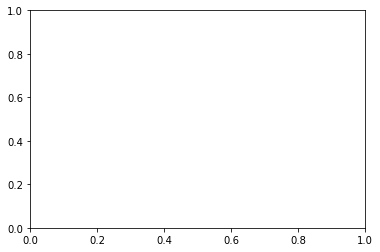

In [8]:
fig, ax = plt.subplots()
plt.show()

# Figure with axes in grid

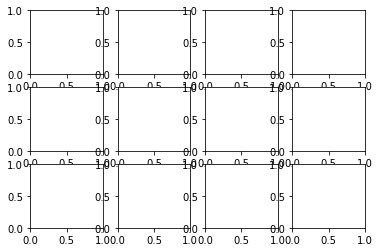

In [9]:
fig, axs = plt.subplots(3,4)
plt.show()

# lineplot 

## Object Oriented Method

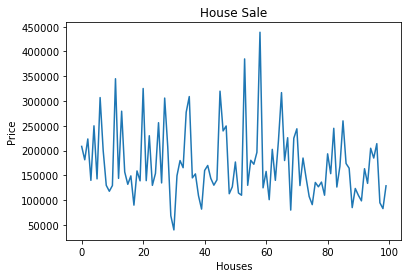

In [10]:
fig, ax = plt.subplots()
ax.plot(df.SalePrice[:100],
       label='Monthly Charges')
ax.set_xlabel("Houses")
ax.set_ylabel("Price")
ax.set_title("House Sale")
plt.show()

## pyplot Method

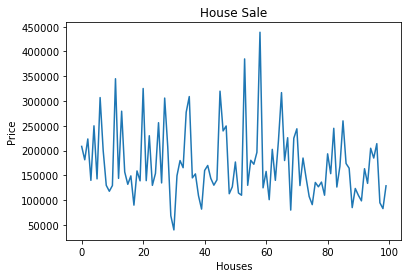

In [11]:
plt.plot(df.SalePrice[:100],
       label='Monthly Charges')
plt.xlabel("Houses")
plt.ylabel("Price")
plt.title("House Sale")
plt.show()

In [12]:
df.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

## Multiple line plot on single axes

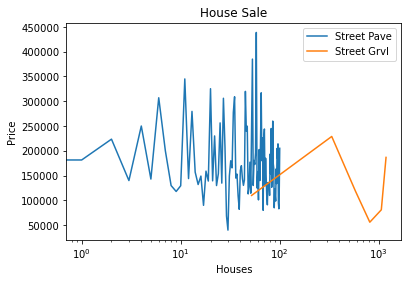

In [13]:
for Street in df.Street.unique():
    plt.plot(df[df['Street'] == Street].SalePrice[:100],
           label=f'Street {Street}')
plt.xlabel("Houses")
plt.ylabel("Price")
plt.xscale('log')
plt.title("House Sale")
plt.legend()
plt.show()

## Lineplot with format

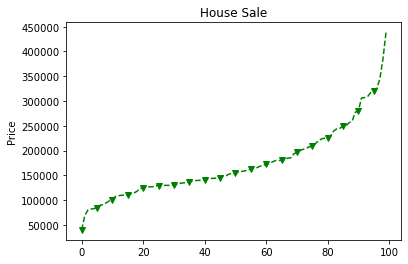

In [14]:
plt.plot(df.SalePrice[:100].sort_values().values,
       label='Monthly Charges',
        marker='v', # ^ x o + | 1 2 3 4 v
        color='green',
        linestyle='--', # '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
        markevery=5)
plt.ylabel("Price")
plt.title("House Sale")
plt.draw()

[]

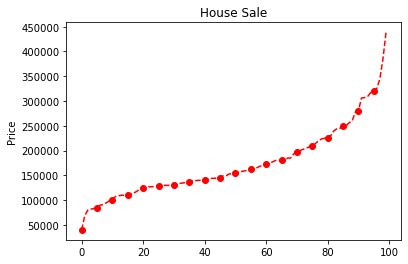

In [15]:
plt.plot(df.SalePrice[:100].sort_values().values,
         'r--o',
         label='Monthly Charges',
        markevery=5)
plt.ylabel("Price")
plt.title("House Sale")
plt.plot()

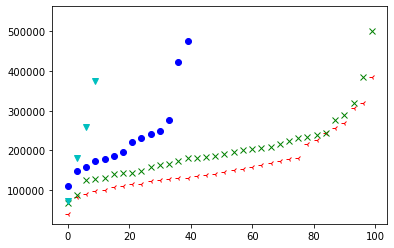

In [16]:
plt.plot(df[df.LotShape == df.LotShape.unique()[0]].SalePrice[:100].sort_values().values, 'r3',
        df[df.LotShape == df.LotShape.unique()[1]].SalePrice[:100].sort_values().values, 'gx',
        df[df.LotShape == df.LotShape.unique()[2]].SalePrice[:100].sort_values().values, 'bo',
        df[df.LotShape == df.LotShape.unique()[3]].SalePrice[:100].sort_values().values, 'cv',
        markevery=3)
plt.show()

# Scatter Plot

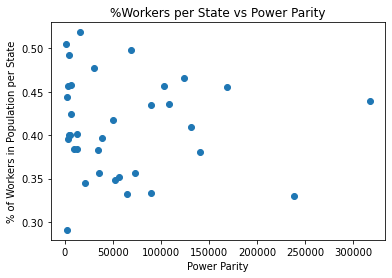

In [17]:
plt.scatter(indcen['Total_Power_Parity'],
           indcen['perc_workers'])
plt.title("%Workers per State vs Power Parity")
plt.xlabel('Power Parity')
plt.ylabel('% of Workers in Population per State')
plt.show()

## Scatter Size

No handles with labels found to put in legend.


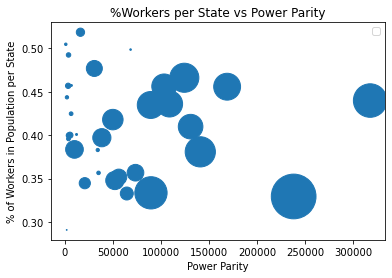

In [18]:
plt.scatter(indcen['Total_Power_Parity'],
           indcen['perc_workers'],
           s=indcen['Population']/1E5)
plt.title("%Workers per State vs Power Parity")
plt.xlabel('Power Parity')
plt.ylabel('% of Workers in Population per State')
plt.show()

## Scatter Color

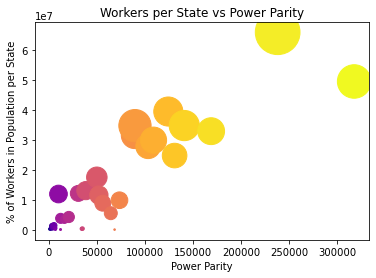

In [19]:
plt.scatter(indcen['Total_Power_Parity'],
           indcen['Workers'],
           s=indcen['Population']/1E5,
           c=range(indcen.index.nunique()),
           cmap='plasma')
plt.title("Workers per State vs Power Parity")
plt.xlabel('Power Parity')
plt.ylabel('% of Workers in Population per State')
# plt.legend(range(indcen.index.nunique()), indcen.index)
plt.show()

## Scatter using DataFrame

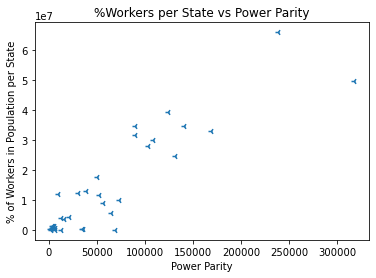

In [20]:
plt.scatter('Total_Power_Parity', 
            'Workers',
           data=indcen,
           marker='3')
plt.title("%Workers per State vs Power Parity")
plt.xlabel('Power Parity')
plt.ylabel('% of Workers in Population per State')
plt.show()

# Bar Chart

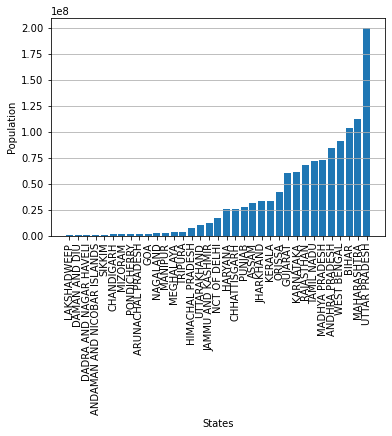

In [21]:
plt.bar(indcen.sort_values('Population').index,
       indcen.sort_values('Population').Population)
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Population')
plt.grid(axis='y')
plt.show()

## Stacking BarCharts

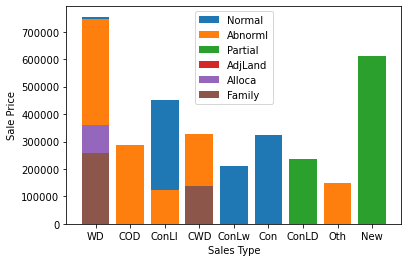

In [22]:
for con in df.SaleCondition.unique():
    plt.bar(df[df.SaleCondition == con].SaleType,
            df[df.SaleCondition == con].SalePrice,
            label=f'{con}')
plt.xlabel('Sales Type')
plt.ylabel('Sale Price')
plt.legend()
plt.show()

## Horizontal Bar

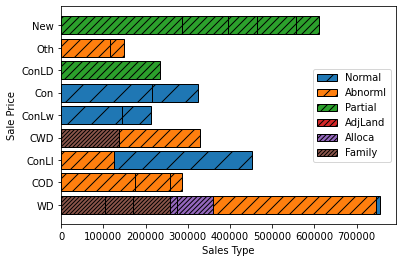

In [23]:
for i, con in enumerate(df.SaleCondition.unique()):
    plt.barh(df[df.SaleCondition == con].SaleType,
            df[df.SaleCondition == con].SalePrice,
            label=f'{con}',
            edgecolor='black', 
            hatch=f"{'/'*(i+1)}")
plt.xlabel('Sales Type')
plt.ylabel('Sale Price')
plt.legend()
plt.show()

# Histogram

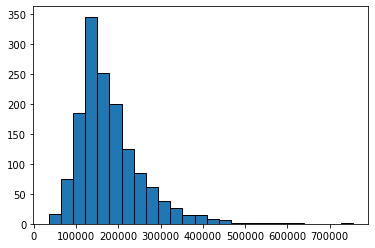

In [24]:
plt.hist(df.SalePrice,
         bins=25,
        edgecolor='k',
        )
plt.show()

## Horizontal Histogram

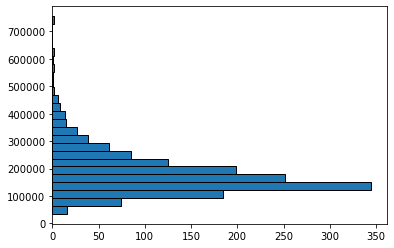

In [25]:
plt.hist(df.SalePrice,
         bins=25,
        edgecolor='k',
        orientation='horizontal')

plt.show()

## Normal Colors

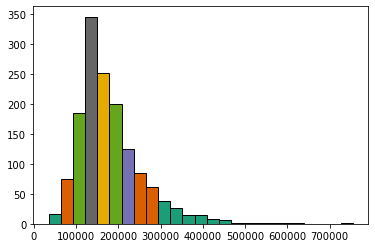

In [512]:
N, bins, patches = plt.hist(df.SalePrice,
                            bins=25,
                            edgecolor='k')

fracs = N/N.max()
norm = colors.Normalize(fracs.min(), fracs.max(), clip=True)

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.Dark2(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.show()

# Area Plot

In [ ]:
plt.plot(indcen.Population, 
        'g--',
        lw=1)
plt.fill_between(indcen.Population.index,
                 indcen.Population.values,
                color='g',
                alpha=0.5)
plt.xlabel('')
plt.ylabel('Population')
plt.title('Population Area Plot')
plt.xticks([])
plt.show()

## Stacking Area Plots

In [ ]:
plt.plot(range(50),df[df.MSZoning == 'RL'].SalePrice[:50], 
        'g--',
        lw=1)
plt.fill_between(range(50),
                 df[df.MSZoning == 'RL'].SalePrice[:50],                
                color='g',
                alpha=0.7,
                label='RL')

plt.plot(range(50),df[df.MSZoning == 'RM'].SalePrice[:50], 
        'g--',
        lw=1)
plt.fill_between(range(50),
                 df[df.MSZoning == 'RM'].SalePrice[:50],                
                color='r',
                alpha=0.5,
                label='RM')

plt.plot(range(50),df[df.MSZoning == 'FV'].SalePrice[:50], 
        'g--',
        lw=1)
plt.fill_between(range(50),
                 df[df.MSZoning == 'FV'].SalePrice[:50],                
                color='b',
                alpha=0.3,
                label='FV')
plt.ylabel('Sales Price')
plt.legend()
plt.show()

# Pie Chart

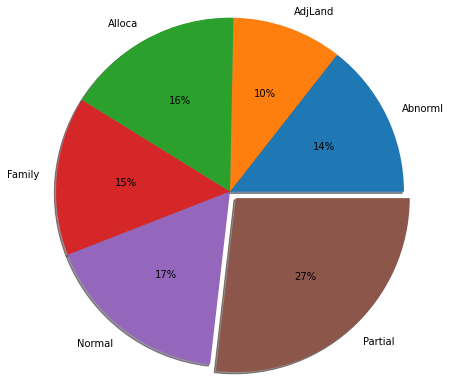

In [84]:
p = df.groupby('SaleCondition').mean()['SalePrice']

explode=np.zeros(p.size)
explode[p.argmax()]=0.1

plt.pie(p, 
        labels=p.index, 
        explode=explode,
        shadow=True,
        autopct='%1.0f%%',
        radius=2)
plt.show()

## Nested Pie Chart

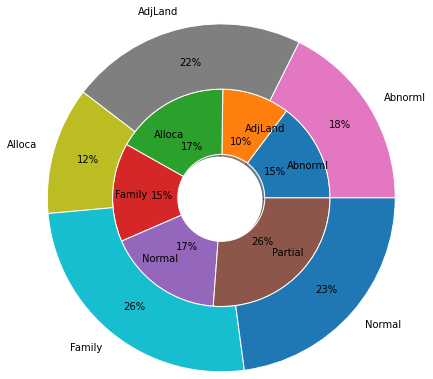

In [131]:
plt.pie(df[df.CentralAir == 'Y'].groupby('SaleCondition').mean()['SalePrice'], 
        labels=df[df.CentralAir == 'Y'].groupby('SaleCondition').mean()['SalePrice'].index, 
        shadow=True,
        autopct='%1.0f%%',
        radius=1.25,
        pctdistance=0.55,
        labeldistance=0.68,
       wedgeprops=dict(width=0.75, edgecolor='w'))

plt.pie(df[df.CentralAir == 'N'].groupby('SaleCondition').mean()['SalePrice'], 
        labels=df[df.CentralAir == 'N'].groupby('SaleCondition').mean()['SalePrice'].index, 
#         shadow=True,
        autopct='%1.0f%%',
        radius=2,
        pctdistance=0.8,
       wedgeprops=dict(width=0.75, edgecolor='w'))
plt.show()

## Donut

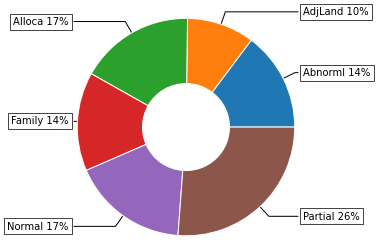

In [188]:
wedges, texts = plt.pie(df[df.CentralAir == 'Y'].groupby('SaleCondition').mean()['SalePrice'],
                      radius=1.25,
                      wedgeprops=dict(width=0.75, edgecolor='w'))

p = df[df.CentralAir == 'Y'].groupby('SaleCondition').mean()['SalePrice']
labels = p.index
perc = (p.values/p.values.sum())*100
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    kw = dict(arrowprops=dict(arrowstyle="-",
                             connectionstyle=f"angle,angleA=0,angleB={ang}"),
              bbox=dict(boxstyle="square,pad=0.3", 
                        fc="w", 
                        ec="k", 
                        lw=0.72),
              zorder=0, 
              va="center")
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    plt.annotate(labels[i] + ' ' + str(int(perc[i])) + '%', xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)



plt.show()

# 3D Plot

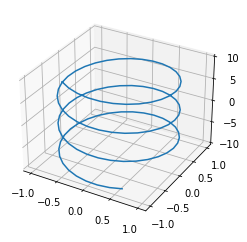

In [406]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
z = np.linspace(-10,10,100)
x = np.sin(z)
y = np.cos(z) 
ax.plot(x, y, z)
plt.show()

## Scatter

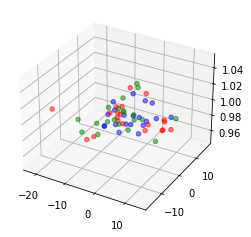

In [289]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=np.random.randn(1, 20) * 8 ,ys=np.random.randn(1, 20) * 8.5, zs=1, color='r', alpha=0.5)
ax.scatter(xs=np.random.randn(1, 20) * 7 ,ys=np.random.randn(1, 20) * 7.5, zs=1, color='g', alpha=0.5)
ax.scatter(xs=np.random.randn(1, 20) * 6 ,ys=np.random.randn(1, 20) * 6.5, zs=1, color='b', alpha=0.5)
plt.show()

## Wireframe

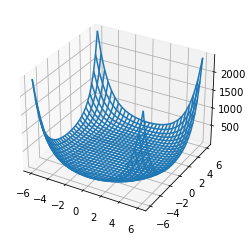

In [409]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x = np.linspace(-6,6,30)
y = np.linspace(-6,6,30)
x_, y_ = np.meshgrid(x, y)

z = lambda x, y: (np.cosh(np.sqrt(x ** 2 + y **2)))
z =z(x_,y_)

ax.plot_wireframe(x_,y_,z)
plt.show()

## Surface

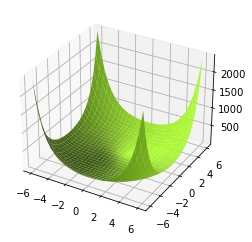

In [416]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(x_, y_, z, color='greenyellow')
plt.show()

## Contour Plot

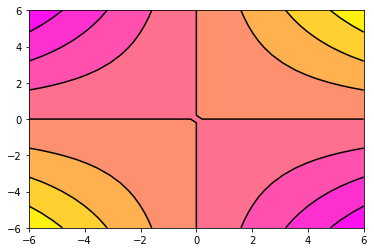

In [452]:
mpl.rcParams['contour.negative_linestyle'] = 'solid'
plt.contour(x, y, np.outer(np.linspace(-5,5,30), np.linspace(-1.5,1.5,30)), colors='k')
plt.contourf(x, y, np.outer(np.linspace(-5,5,30), np.linspace(-1.5,1.5,30)), cmap='spring')
plt.show()

# Stream Plot

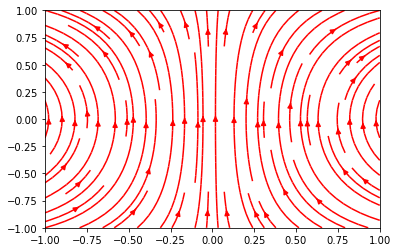

In [509]:
x = np.linspace(-1,1,30)
y = np.linspace(-1,1,30)
plt.streamplot(x, y, np.outer(np.sin(x), np.sin(y)), np.outer(np.cos(x), np.cos(y)), color='r')
plt.show()

# Multiple Plot

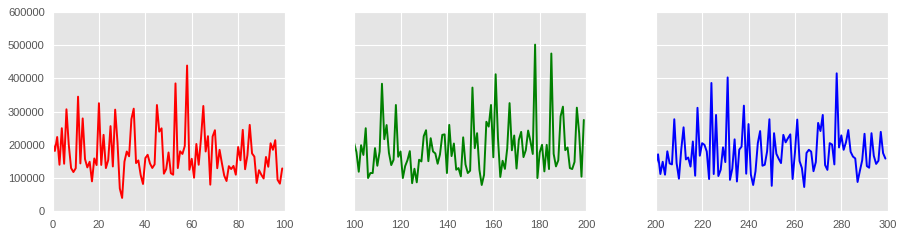

In [549]:
plt.style.use('ggplot')
fig, axs = plt.subplots(1,3, figsize=(12,3), sharey=True)

axs[0].plot(df[:100].SalePrice, color='r')
axs[1].plot(df[100:200].SalePrice, color='g')
axs[2].plot(df[200:300].SalePrice, color='b')

plt.subplots_adjust(wspace=0.3)
plt.show()

# PyPlot Styles

Solarize_Light2:


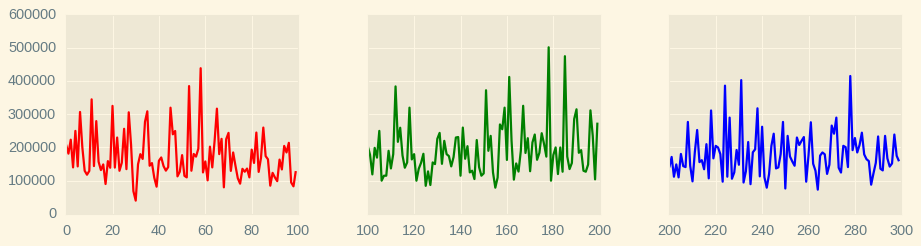

_classic_test_patch:


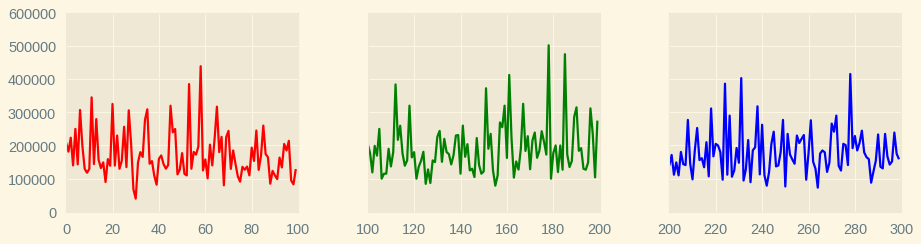

bmh:


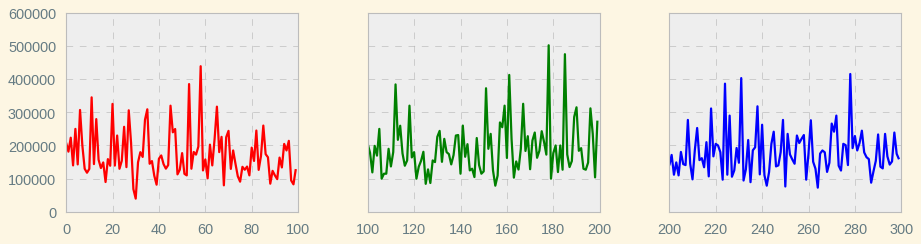

classic:


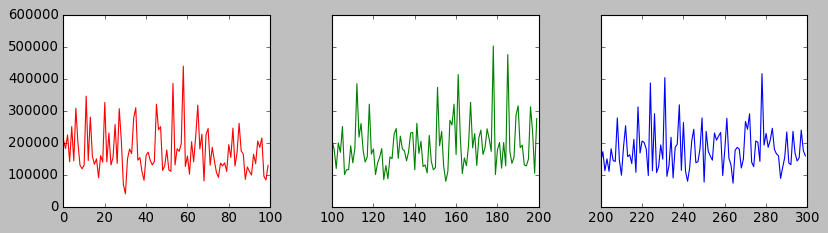

dark_background:


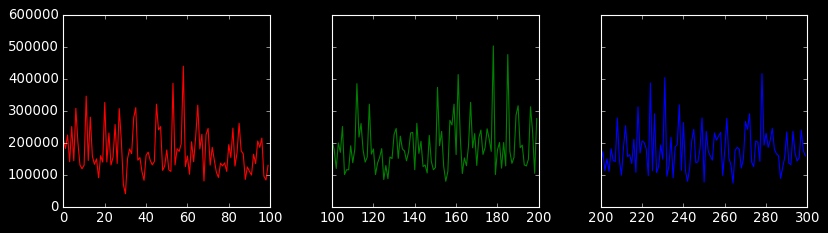

fast:


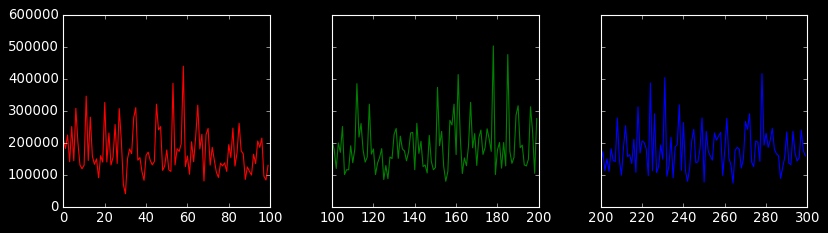

fivethirtyeight:


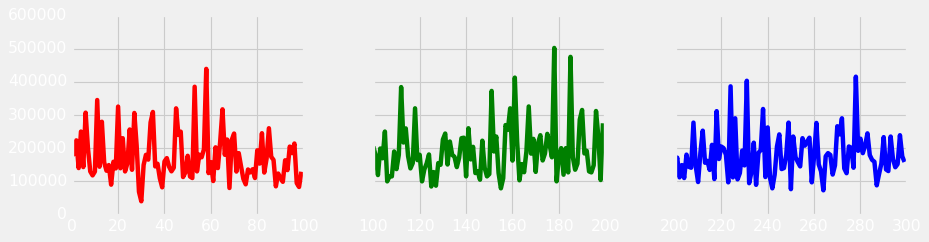

ggplot:


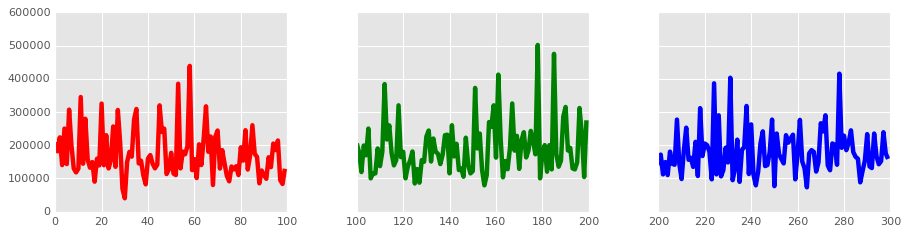

grayscale:


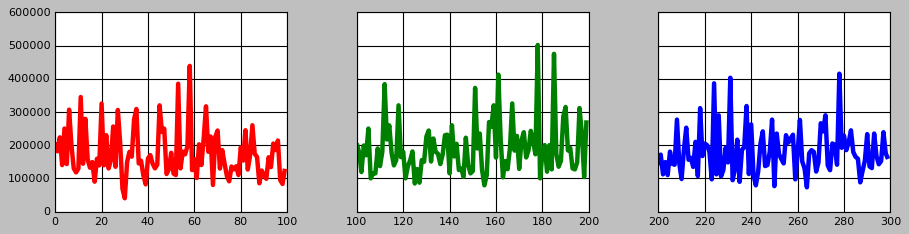

seaborn:


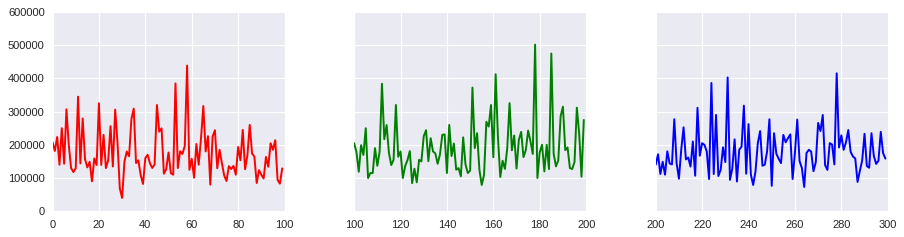

seaborn-bright:


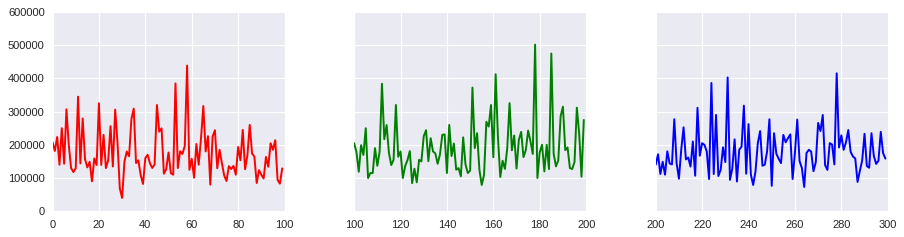

seaborn-colorblind:


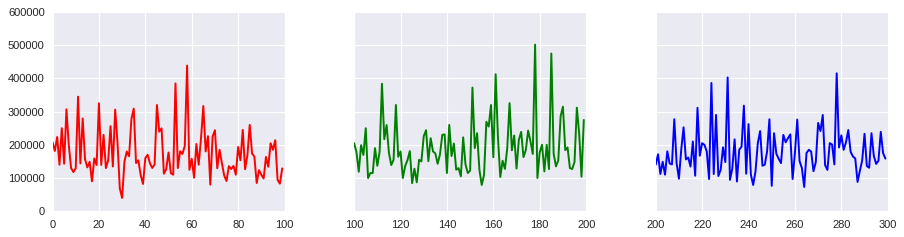

seaborn-dark:


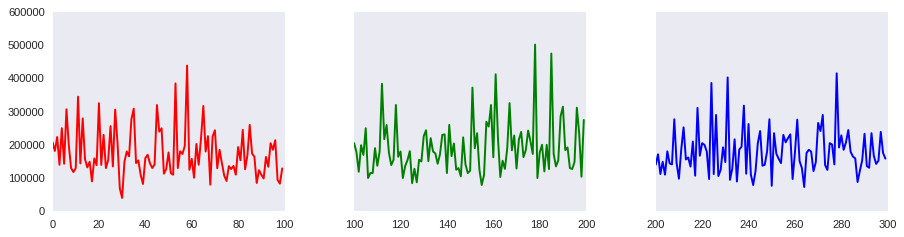

seaborn-dark-palette:


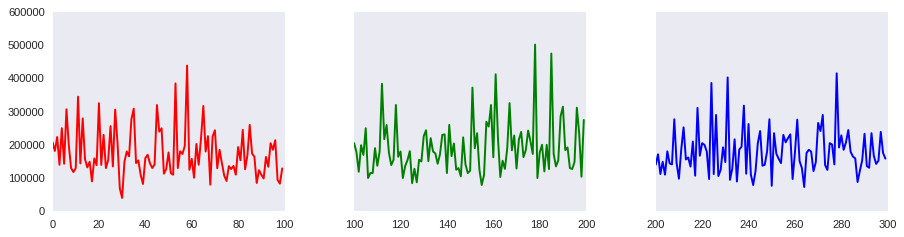

seaborn-darkgrid:


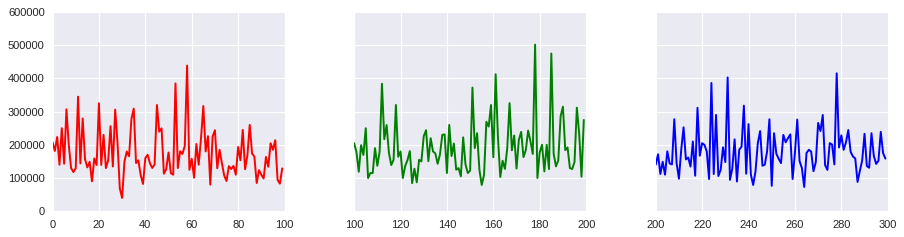

seaborn-deep:


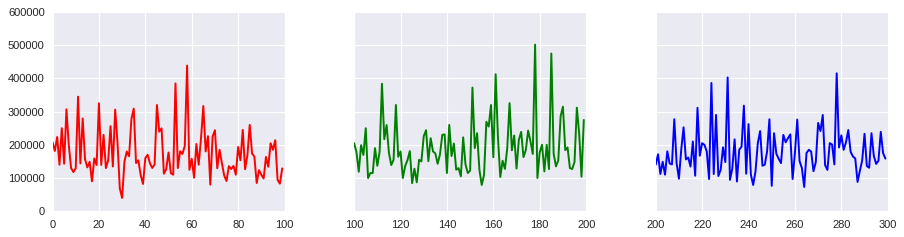

seaborn-muted:


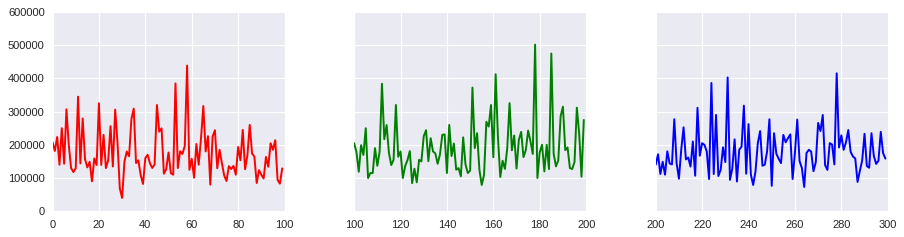

seaborn-notebook:


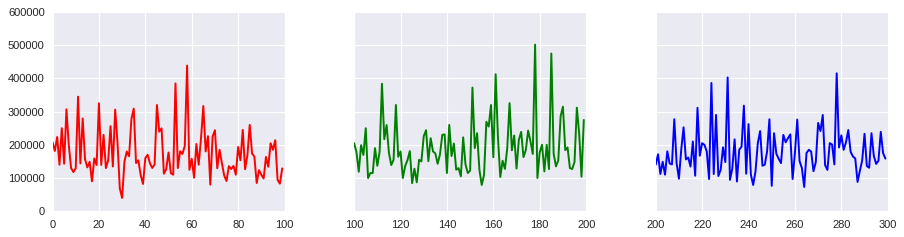

seaborn-paper:


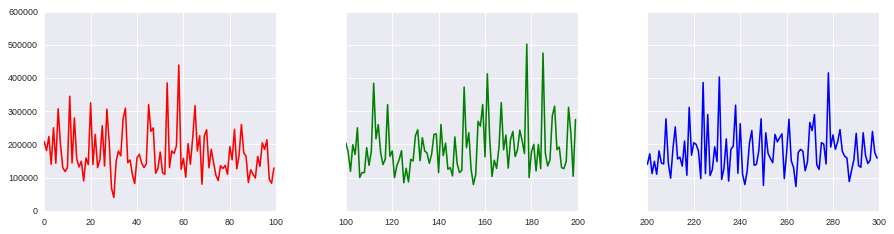

seaborn-pastel:


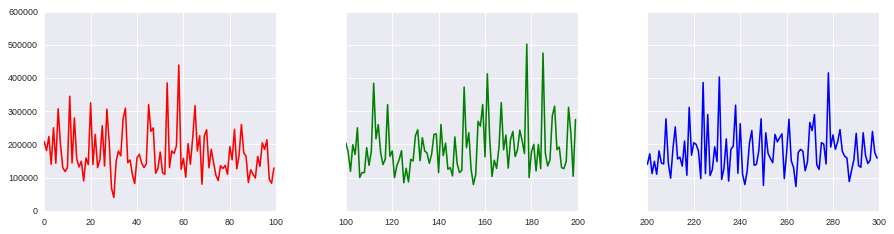

seaborn-poster:


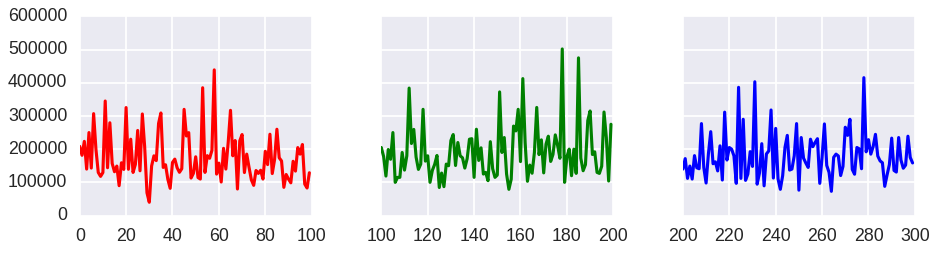

seaborn-talk:


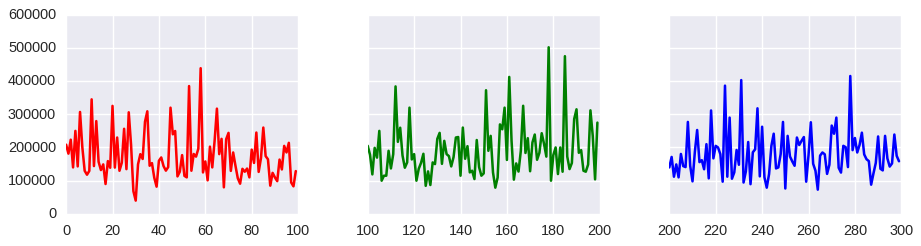

seaborn-ticks:


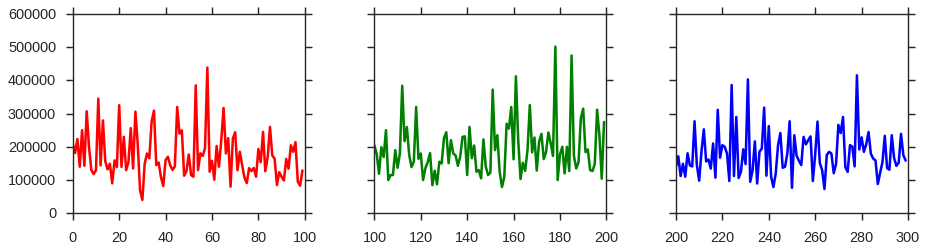

seaborn-white:


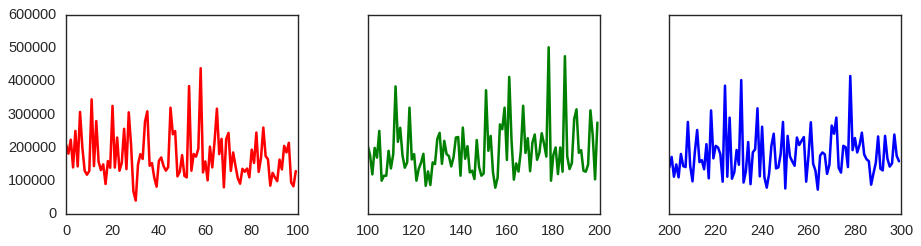

seaborn-whitegrid:


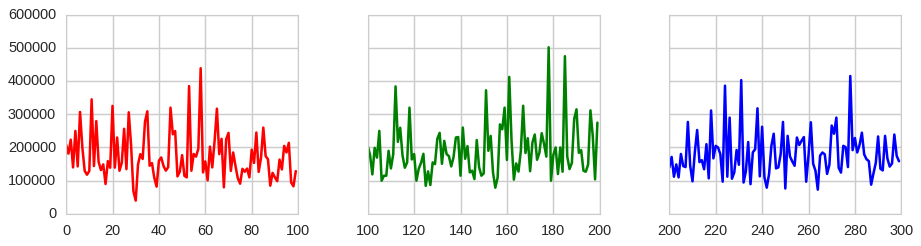

tableau-colorblind10:


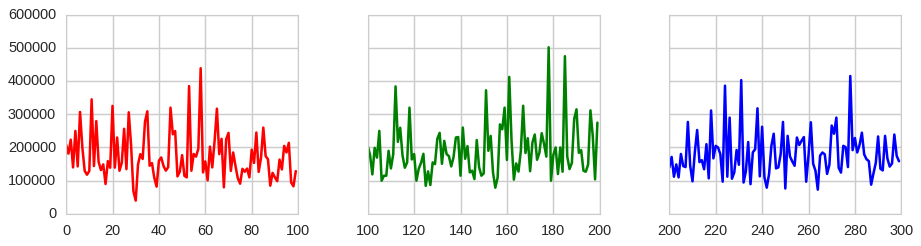

In [544]:
for st in plt.style.available:
    print(f'{st}:')
    plt.style.use(st)
    fig, axs = plt.subplots(1,3, figsize=(12,3), sharey=True)

    axs[0].plot(df[:100].SalePrice, color='r')
    axs[1].plot(df[100:200].SalePrice, color='g')
    axs[2].plot(df[200:300].SalePrice, color='b')

    plt.subplots_adjust(wspace=0.3)
    plt.show()